In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
import pickle
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv(r"C:\Users\iamanu\Desktop\SB_GuidedProject\CO2-Emission-of-Cars-main\Dataset\Sample.csv")

In [3]:
data.head(5)

,MODEL,MAKE,MODEL.1,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION*,Unnamed: 9,Unnamed: 10,Unnamed: 11,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301


In [4]:
data=data.drop("MODEL",axis=1,inplace=False)

In [5]:
data.columns

Index(['MAKE', 'MODEL.1', 'VEHICLE CLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL_CONSUMPTION*', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'CO2_EMISSIONS'],
      dtype='object')

In [6]:
data.columns=['Make', 'MODEL.1', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City', 'Fuel_Consumption_Mwy',
       'Fuel_Consumption_Comb(L/100 km)', 'Fuel_Consumption_mpg', 'CO2_Emissions']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Make                             679 non-null    object 
 1   MODEL.1                          679 non-null    object 
 2   Vehicle_Class                    679 non-null    object 
 3   Engine_Size                      679 non-null    float64
 4   Cylinders                        679 non-null    int64  
 5   Transmission                     679 non-null    object 
 6   Fuel_Type                        679 non-null    object 
 7   Fuel_Consumption_City            679 non-null    float64
 8   Fuel_Consumption_Mwy             679 non-null    float64
 9   Fuel_Consumption_Comb(L/100 km)  679 non-null    float64
 10  Fuel_Consumption_mpg             679 non-null    int64  
 11  CO2_Emissions                    679 non-null    int64  
dtypes: float64(4), int64(3

In [8]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Mwy,Fuel_Consumption_Comb(L/100 km),Fuel_Consumption_mpg,CO2_Emissions
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,3.252577,5.798233,14.591900,10.613844,12.802798,23.107511,293.656848
std,1.203751,1.531073,3.025654,2.357724,2.685590,5.308083,60.372456
min,1.000000,3.000000,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2.200000,4.000000,12.700000,9.000000,11.000000,19.000000,253.000000
50%,3.000000,6.000000,14.300000,10.100000,12.300000,23.000000,283.000000
75%,4.200000,6.000000,16.650000,12.500000,14.850000,26.000000,340.000000
max,8.000000,12.000000,23.200000,18.000000,20.800000,63.000000,478.000000


In [9]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([3, 4, 5], dtype=int64))

In [10]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['Make', 'MODEL.1', 'Vehicle_Class', 'Transmission', 'Fuel_Type'],
      dtype=object)

In [11]:
for i in cat:
    print("Column :",i)
    print("count of classes :",data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : Make
count of classes : 34
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
************************************************************************************************************************
Column : MODEL.1
count of classes : 351
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERADO': 5, 'K1500 SILVERADO 4X4': 5, 'F150': 5, 'F150 4X4': 5, 'C1500 SIERRA': 5, 'A4 QUATTRO': 4, 'A6 QUATTRO': 4, 'Z3': 4, 'CAMARO': 4, 'CAVALIER': 4, 'S10 FFV': 4, 'INTREPID': 4, 'SEBRING COUPE': 4, 'LANOS': 4, 'MUSTAN

In [12]:
data["Transmission"]=np.where(data["Transmission"].isin(["A4","A5","A3"]),"Automatic",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["M5","M6"]),"Manual",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["AS4","AS5"]),"Automatic with Select Shift",data["Transmission"])
data["Transmission"]=np.where(data["Transmission"].isin(["AV"]),"Continuously Variable",data["Transmission"])
c(data['Transmission'])


Counter({'Automatic': 425,
         'Manual': 224,
         'Automatic with Select Shift': 29,
         'Continuously Variable': 1})

In [13]:
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="Z","Premium Gasoline",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="X","Regular Gasoline",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="D","Diesel",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="E","Ethanol(EBS)",data["Fuel_Type"])
data["Fuel_Type"]=np.where(data["Fuel_Type"]=="N","Natural Gas",data["Fuel_Type"])
c(data["Fuel_Type"])

Counter({'Regular Gasoline': 442,
         'Premium Gasoline': 223,
         'Ethanol(EBS)': 4,
         'Natural Gas': 4,
         'Diesel': 6})

In [14]:
data.dtypes[data.dtypes!='O'].index.values

array(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Mwy', 'Fuel_Consumption_Comb(L/100 km)',
       'Fuel_Consumption_mpg', 'CO2_Emissions'], dtype=object)

In [15]:
data.isnull().sum()

Make                               0
MODEL.1                            0
Vehicle_Class                      0
Engine_Size                        0
Cylinders                          0
Transmission                       0
Fuel_Type                          0
Fuel_Consumption_City              0
Fuel_Consumption_Mwy               0
Fuel_Consumption_Comb(L/100 km)    0
Fuel_Consumption_mpg               0
CO2_Emissions                      0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
x='*'
for i in cat:
    print("LABEL ENCODING OF:",i)
    LE=LabelEncoder()
    print(c(data[i]))
    data[i]=LE.fit_transform(data[i])
    print(c(data[i]))
    print(x*100)

LABEL ENCODING OF: Make
Counter({'FORD': 63, 'CHEVROLET': 60, 'DODGE': 47, 'BMW': 43, 'GMC': 41, 'TOYOTA': 36, 'VOLKSWAGEN': 35, 'MERCEDES-BENZ': 29, 'CHRYSLER': 25, 'AUDI': 24, 'MAZDA': 24, 'VOLVO': 24, 'NISSAN': 23, 'PONTIAC': 19, 'SAAB': 15, 'SATURN': 15, 'SUZUKI': 15, 'HONDA': 14, 'SUBARU': 13, 'HYUNDAI': 12, 'ACURA': 11, 'DAEWOO': 10, 'JAGUAR': 10, 'KIA': 10, 'PORSCHE': 10, 'JEEP': 9, 'LEXUS': 8, 'LINCOLN': 7, 'OLDSMOBILE': 7, 'BUICK': 6, 'INFINITI': 5, 'CADILLAC': 4, 'ISUZU': 4, 'PLYMOUTH': 1})
Counter({9: 63, 5: 60, 8: 47, 2: 43, 10: 41, 31: 36, 32: 35, 21: 29, 6: 25, 1: 24, 20: 24, 33: 24, 22: 23, 25: 19, 27: 15, 28: 15, 30: 15, 11: 14, 29: 13, 12: 12, 0: 11, 7: 10, 15: 10, 17: 10, 26: 10, 16: 9, 18: 8, 19: 7, 23: 7, 3: 6, 13: 5, 4: 4, 14: 4, 24: 1})
****************************************************************************************************
LABEL ENCODING OF: MODEL.1
Counter({'RAM 1500': 9, 'DAKOTA': 6, 'DAKOTA 4X4': 6, 'K1500 SIERRA 4X4': 6, 'JETTA': 6, 'C1500 SILVERA

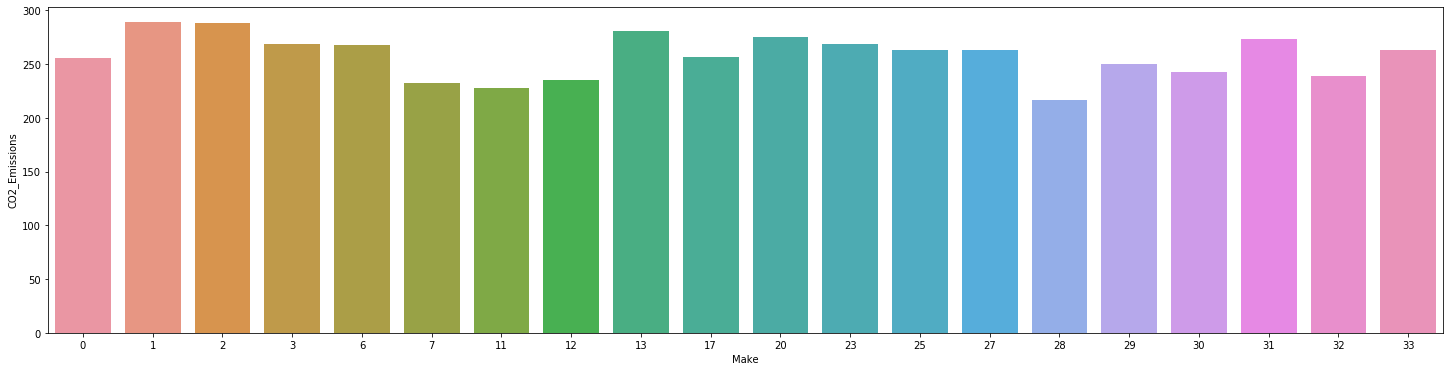

In [17]:
MCO2=data.groupby(['Make'])['CO2_Emissions'].mean().sort_values()[:20].reset_index()
plt.figure(figsize=(25,6))
sns.barplot(x="Make",y="CO2_Emissions",data=MCO2)

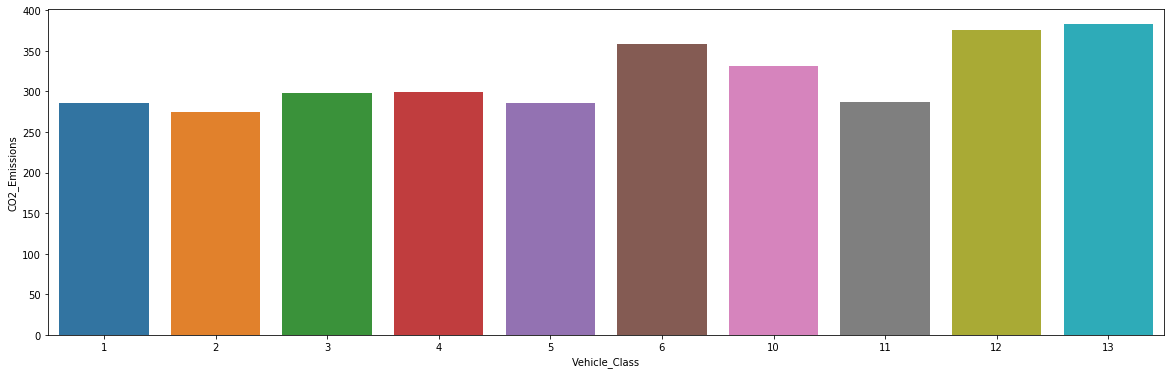

In [18]:
VC=data.groupby(['Vehicle_Class'])['CO2_Emissions'].mean().sort_values(ascending=False)[:10].reset_index()
plt.figure(figsize=(20,6))
sns.barplot(x="Vehicle_Class",y="CO2_Emissions",data=VC)

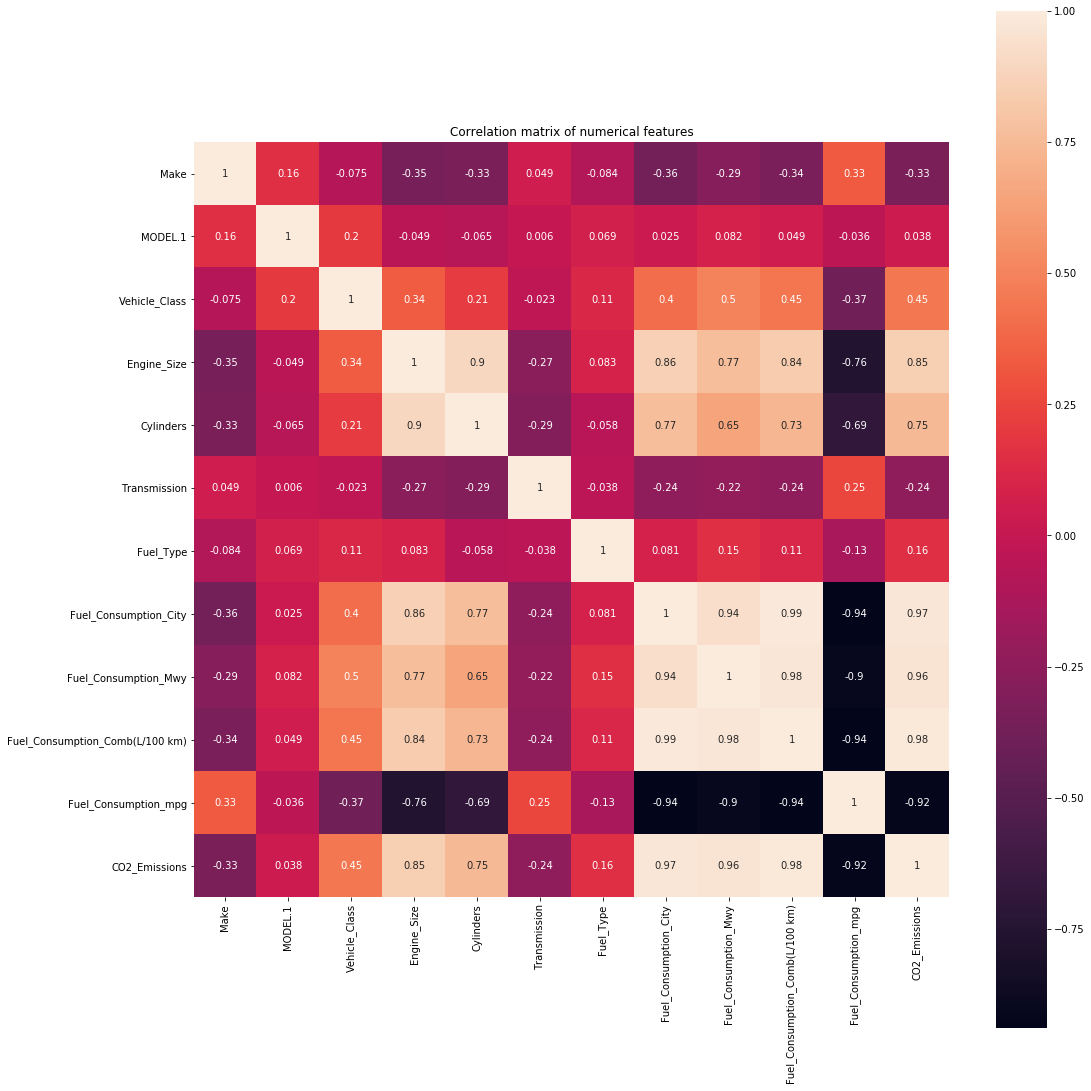

In [19]:
corr = data.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True,square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

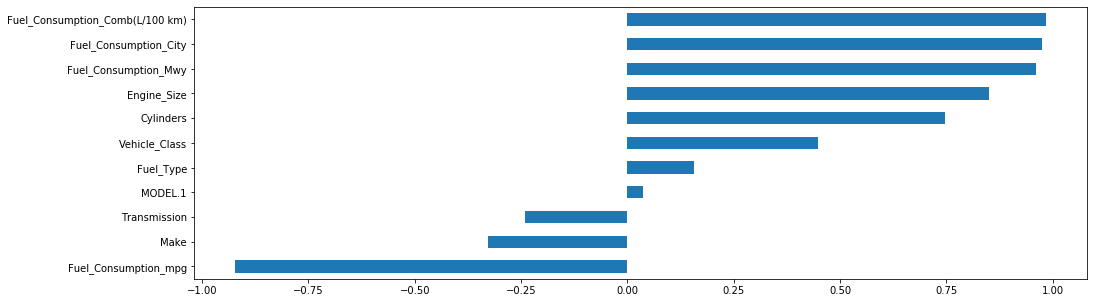

In [20]:
plt.figure(figsize=(16,5))
corr["CO2_Emissions"].sort_values(ascending=True)[:-1].plot(kind="barh")

In [21]:
x=data.drop(['CO2_Emissions','Fuel_Consumption_Comb(L/100 km)','MODEL.1'],axis=1)
x=pd.DataFrame(x)
y=data['CO2_Emissions']
y=pd.DataFrame(y)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(x_test.shape)

(543, 9)
(136, 9)


In [23]:
Lr=LinearRegression()
Lr=Lr.fit(x_train,y_train)

In [31]:
y_pred=Lr.predict(x_test)
y_pred

array([[354.85171194],
       [268.4531707 ],
       [297.60466559],
       [193.3382349 ],
       [341.50860242],
       [343.92395653],
       [222.27378841],
       [294.07573247],
       [263.1368257 ],
       [209.03213488],
       [285.54329257],
       [277.82183883],
       [287.76554147],
       [428.15918777],
       [217.86410296],
       [343.0229313 ],
       [339.376677  ],
       [347.35915488],
       [232.63908778],
       [336.53765593],
       [256.38284942],
       [365.34981444],
       [348.4734845 ],
       [369.40493529],
       [240.17803987],
       [160.19361701],
       [266.35988375],
       [192.76228697],
       [298.09905274],
       [309.2563186 ],
       [389.16961768],
       [260.23251057],
       [263.66960713],
       [279.69974172],
       [282.36328082],
       [235.88174772],
       [269.37956017],
       [235.80954707],
       [397.71787918],
       [321.76032239],
       [297.18887096],
       [280.38247127],
       [199.73208844],
       [268

In [32]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  5.327868570518985
MSE:  260.82431344914244
RMSE:  16.15005614383871


In [33]:
y=Lr.predict([[0,0,1.7,4,0,4,9.3,7.2,34]])
y

array([[194.30811772]])

In [34]:
pickle.dump(Lr,open("CO2.pkl","wb"))